## 1. Data Exploration & Preprocessing




#### **1.1 Load and Inspect Data**


##### import library

In [8]:
# Data Handling
import pandas as pd
import numpy as np

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Preprocessing & Feature Engineering
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score, 
    f1_score, 
    confusion_matrix, 
    mean_absolute_error, 
    mean_squared_error, 
    r2_score
)

# Natural Language Processing (NLP)
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
from sentence_transformers import SentenceTransformer
from textblob import TextBlob

# Deep Learning (PyTorch)
import torch
import torch.nn as nn
import torch.optim as optim

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

##### Load dataset and examine its structure.



In [9]:
# Load the dataset
df = pd.read_excel(r"Artificial_Data.xlsx")

In [10]:
# Display basic information
print("\nFirst 2 Rows:\n", df.head(2))


First 2 Rows:
   RATING_TYPE Rating  FundaIndxint  FundaIndxsga  monthvwretd  monthvwretx  \
0       Fitch     A+      0.150659     -0.420047    -0.846934     0.560226   
1     Moody's     BB     -0.015715      0.139204    -0.045250    -0.912128   

   monthewretd  monthewretx  monthsprtrn  monthspindx  ...   at_turn  \
0     0.579303    -0.578314    -0.225006    -0.415867  ... -0.810215   
1     0.497292    -0.910558     1.207592    -0.104050  ...  1.201837   

   rect_turn  pay_turn  sale_invcap  sale_equity   rd_sale  adv_sale  \
0   0.308114 -0.596329    -0.235425    -0.456676  1.878286 -1.338060   
1  -0.469586  0.925473    -0.021617    -0.410984  1.426555 -1.121401   

   staff_sale   accrual                                      string_values  
0    0.862565  0.822648  Challenges remain in the supply chain, but str...  
1    0.853764  0.978653  The company reported a steady increase in reve...  

[2 rows x 154 columns]


In [11]:
print("\nColumn Names:", df.columns.tolist())


Column Names: ['RATING_TYPE', 'Rating', 'FundaIndxint', 'FundaIndxsga', 'monthvwretd', 'monthvwretx', 'monthewretd', 'monthewretx', 'monthsprtrn', 'monthspindx', 'monthCAP1RET', 'monthCAP2RET', 'monthCAP3RET', 'monthCAP4RET', 'monthCAP5RET', 'monthCAP6RET', 'monthCAP7RET', 'monthCAP8RET', 'monthCAP9RET', 'monthCAP10RET', 'monthtotval', 'monthtotcnt', 'monthusdval', 'monthusdcnt', 'monthprtcnt', 'monthtotret', 'monthtotind', 'monthcapret', 'monthcapind', 'monthincret', 'monthincind', 'SPIndvwretd', 'SPIndvwretx', 'SPIndewretd', 'SPIndewretx', 'SPIndtotval', 'SPIndtotcnt', 'SPIndusdval', 'SPIndusdcnt', 'SPIndspindx', 'SPIndsprtrn', 'SPporvwretd', 'SPporvwretx', 'SPporewretd', 'SPporewretx', 'SPportotval', 'SPportotcnt', 'SPporusdval', 'SPporusdcnt', 'SPporspindx', 'SPporsprtrn', 'usind2CRSPMEV1', 'usind2CRSPMEG1', 'usind2CRSPLCV1', 'usind2CRSPLCG1', 'usind2CRSPMIV1', 'usind2CRSPMIG1', 'usind2CRSPSCV1', 'usind2CRSPSCG1', 'usind2CRSPMEVT', 'usind2CRSPMEGT', 'usind2CRSPLCVT', 'usind2CRSPLC

In [12]:
print("\nData Types:\n", df.dtypes)


Data Types:
 RATING_TYPE       object
Rating            object
FundaIndxint     float64
FundaIndxsga     float64
monthvwretd      float64
                  ...   
rd_sale          float64
adv_sale         float64
staff_sale       float64
accrual          float64
string_values     object
Length: 154, dtype: object


In [13]:
# Summary statistics
print("\nNumerical Summary:\n", df.describe())


Numerical Summary:
        FundaIndxint  FundaIndxsga  monthvwretd  monthvwretx  monthewretd  \
count    100.000000    100.000000   100.000000   100.000000   100.000000   
mean      -0.067201      0.075317     0.010728     0.127477     0.093248   
std        1.017370      1.029466     1.091580     1.093258     1.111350   
min       -2.318068     -2.339597    -3.478169    -2.277950    -2.572931   
25%       -0.733156     -0.587366    -0.681876    -0.528532    -0.636587   
50%       -0.150513      0.100186     0.020146     0.141856     0.208633   
75%        0.537932      0.750813     0.613014     0.704034     0.806156   
max        3.061095      3.253985     2.539258     2.616700     3.174442   

       monthewretx  monthsprtrn  monthspindx  monthCAP1RET  monthCAP2RET  ...  \
count   100.000000   100.000000   100.000000    100.000000    100.000000  ...   
mean      0.032180    -0.026623     0.107747      0.166456     -0.016642  ...   
std       1.088224     1.025100     0.881458      1

In [14]:
print("\nCategorical Summary:\n", df.describe(include=["object"]))


Categorical Summary:
        RATING_TYPE Rating                                      string_values
count          100    100                                                100
unique           3      8                                                  5
top            S&P    BBB  The company reported a steady increase in reve...
freq            36     18                                                 31


In [15]:
# Missing values analysis
print("\nMissing Values Per Column:\n", df.isnull().sum())


Missing Values Per Column:
 RATING_TYPE      0
Rating           0
FundaIndxint     0
FundaIndxsga     0
monthvwretd      0
                ..
rd_sale          0
adv_sale         0
staff_sale       0
accrual          0
string_values    0
Length: 154, dtype: int64


In [16]:
print("\nMissing Percentage Per Column:\n", df.isnull().mean() * 100)


Missing Percentage Per Column:
 RATING_TYPE      0.0
Rating           0.0
FundaIndxint     0.0
FundaIndxsga     0.0
monthvwretd      0.0
                ... 
rd_sale          0.0
adv_sale         0.0
staff_sale       0.0
accrual          0.0
string_values    0.0
Length: 154, dtype: float64


In [17]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]


In [18]:
# Detect outliers for numerical columns
numerical_columns = df.select_dtypes(include=["number"]).columns
outliers = {col: detect_outliers_iqr(df, col) for col in numerical_columns}

In [19]:
# Print outliers information
for col, outlier_rows in outliers.items():
    if not outlier_rows.empty:
        print(f"\nOutliers detected in '{col}': {len(outlier_rows)} rows")


Outliers detected in 'FundaIndxint': 2 rows

Outliers detected in 'FundaIndxsga': 1 rows

Outliers detected in 'monthvwretd': 1 rows

Outliers detected in 'monthvwretx': 2 rows

Outliers detected in 'monthewretd': 1 rows

Outliers detected in 'monthewretx': 1 rows

Outliers detected in 'monthsprtrn': 3 rows

Outliers detected in 'monthspindx': 2 rows

Outliers detected in 'monthCAP1RET': 1 rows

Outliers detected in 'monthCAP3RET': 1 rows

Outliers detected in 'monthCAP4RET': 1 rows

Outliers detected in 'monthCAP5RET': 1 rows

Outliers detected in 'monthCAP10RET': 2 rows

Outliers detected in 'monthtotval': 1 rows

Outliers detected in 'monthusdval': 1 rows

Outliers detected in 'monthusdcnt': 1 rows

Outliers detected in 'monthprtcnt': 3 rows

Outliers detected in 'monthcapret': 1 rows

Outliers detected in 'SPIndvwretd': 1 rows

Outliers detected in 'SPIndvwretx': 3 rows

Outliers detected in 'SPIndtotcnt': 1 rows

Outliers detected in 'SPIndusdval': 1 rows

Outliers detected in 'S

In [20]:
# Check for duplicate rows
print("\nDuplicate Rows Count:", df.duplicated().sum())


Duplicate Rows Count: 0


In [21]:
# Unique values in categorical columns
for col in df.select_dtypes(include=["object"]).columns:
    print(f"\nUnique Values in '{col}':\n", df[col].value_counts())



Unique Values in 'RATING_TYPE':
 RATING_TYPE
S&P        36
Moody's    33
Fitch      31
Name: count, dtype: int64

Unique Values in 'Rating':
 Rating
BBB     18
AA      16
A+      14
A       12
BB      11
AAA     10
BBB+    10
AA+      9
Name: count, dtype: int64

Unique Values in 'string_values':
 string_values
The company reported a steady increase in revenue, reflecting strong market demand.                                     31
Challenges remain in the supply chain, but strategic investments in logistics are improving efficiencies.               23
The outlook remains positive, with expected growth in both domestic and international markets.                          23
Earnings before interest and taxes improved significantly from last year, driven by cost reduction measures.            14
Despite market volatility, the firm's financial position is strong, with solid liquidity and manageable debt levels.     9
Name: count, dtype: int64


#### **1.2 Data Cleaning & Transformation**


#### Handle missing values through imputation or removal.

    

In [22]:
# Numerical: Fill with median
# Categorical: Fill with most frequent value
# but we do not have null values

In [23]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    """Detect outliers in a column using the IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[column] < lower_bound) | (df[column] > upper_bound)

# Function to replace outliers with median
def replace_outliers_with_median(df):
    """Replace outliers in numerical columns with the median of the respective column."""
    df = df.copy()
    numerical_columns = df.select_dtypes(include=["number"]).columns
    
    for col in numerical_columns:
        median_value = df[col].median(skipna=True)
        outliers_mask = detect_outliers_iqr(df, col)
        df.loc[outliers_mask, col] = median_value
    
    return df

# Apply function to replace outliers
df = replace_outliers_with_median(df)

#### Normalize numerical features if needed.

In [24]:
# Identify numerical and categorical columns
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Standardize numerical data
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Display processed data
print(df.head())

  RATING_TYPE Rating  FundaIndxint  FundaIndxsga  monthvwretd  monthvwretx  \
0       Fitch     A+      0.304420     -0.476585    -0.868372     0.468181   
1     Moody's     BB      0.123096      0.098050    -0.088487    -0.962521   
2       Fitch     BB     -1.309369     -0.043120    -2.539082     0.892712   
3       Fitch    BBB      0.112663      0.731746     1.067186    -0.304858   
4     Moody's     AA      1.604085      1.941747    -1.889640     0.378351   

   monthewretd  monthewretx  monthsprtrn  monthspindx  ...   at_turn  \
0     0.485774    -0.633548    -0.305962    -0.588449  ... -0.981427   
1     0.408524    -0.959111     1.265967    -0.202125  ...  1.257097   
2     0.658663    -0.920216     0.193831     0.565180  ...  0.564065   
3     0.541032    -1.646411     0.415281     1.406309  ... -0.155111   
4    -0.476645     1.255702     0.534546     0.046400  ...  0.805248   

   rect_turn  pay_turn  sale_invcap  sale_equity   rd_sale  adv_sale  \
0   0.278699 -0.801791    

#### Encode categorical features appropriately.

In [25]:
print("\nUnique Values in 'RATING_TYPE':\n", df["RATING_TYPE"].unique())
print("\nUnique Values in 'Rating':\n", df["Rating"].unique())


Unique Values in 'RATING_TYPE':
 ['Fitch' "Moody's" 'S&P']

Unique Values in 'Rating':
 ['A+' 'BB' 'BBB' 'AA' 'AAA' 'A' 'AA+' 'BBB+']


In [26]:
# One-hot encode the 'RATING_TYPE' column
df = pd.get_dummies(df, columns=['RATING_TYPE'], drop_first=True)

# Ordinal encode the 'Rating' column
rating_order = {
    'AAA': 1,
    'AA+': 2,
    'AA': 3,
    'A+': 4,
    'A': 5,
    'BBB+': 6,
    'BBB': 7,
    'BB': 8
}
df['Rating_encoded'] = df['Rating'].map(rating_order)

## 2. NLP Feature Engineering



##### **2.1 Text Preprocessing**

Remove punctuation, convert text to lowercase, remove stopwords, apply stemming or lemmatization where applicable.

In [27]:
# Download required resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text, use_stemming=False):
    """Preprocess text by removing punctuation, converting to lowercase,
    removing stopwords, and applying stemming or lemmatization."""
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    words = text.split()  # Tokenize words
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    words = [stemmer.stem(word) if use_stemming else lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)  # Rejoin words

# Apply text preprocessing
df['cleaned_string_values'] = df['string_values'].apply(lambda x: preprocess_text(x, use_stemming=False))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


##### 2.2 Text Vectorization


Convert text into numerical format using TF-IDF, Word2Vec, or embeddings.

In [28]:
# Load pre-trained BERT model
bert_model = SentenceTransformer('all-MiniLM-L6-v2')

# Get BERT embeddings
df['bert_embedding'] = bert_model.encode(df['cleaned_string_values'].tolist()).tolist()

##### 2.3 Additional Features (Optional)

Extract sentiment scores using NLP tools.

Perform topic modeling if relevant.

In [29]:
def get_sentiment(text):
    """Calculate sentiment polarity using TextBlob."""
    return TextBlob(text).sentiment.polarity  # Returns a score between -1 and 1

# Compute sentiment scores
df['sentiment'] = df['cleaned_string_values'].apply(get_sentiment)

## 3. Predictive Modeling

##### 3.1 Define Your Target

#### Train a structured-only model.


In [30]:
# Dropping non-structured columns and setting up target variable
X = df.drop(columns=["Rating", "Rating_encoded", "string_values", "RATING_TYPE_Moody's", "RATING_TYPE_S&P", "cleaned_string_values", "bert_embedding", "sentiment"])
y = df["Rating_encoded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# Dictionary to store model predictions for structured data
model_predictions_structured = {}

In [32]:
# K-Nearest Neighbors (KNN) Model
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='accuracy')
knn.fit(X_train, y_train)
model_predictions_structured['KNN'] = knn.predict(X_test)
print("Best KNN Parameters:", knn.best_params_)

Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}


In [33]:
# Logistic Regression Model
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
log_reg = GridSearchCV(LogisticRegression(), param_grid_lr, cv=3, scoring='accuracy')
log_reg.fit(X_train, y_train)
model_predictions_structured['Logistic Regression'] = log_reg.predict(X_test)
print("Best Logistic Regression Parameters:", log_reg.best_params_)

Best Logistic Regression Parameters: {'C': 0.01, 'solver': 'lbfgs'}


In [34]:
# Decision Tree Model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
model_predictions_structured['Decision Tree'] = dt.predict(X_test)

In [35]:
# Random Forest Model
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomizedSearchCV(RandomForestClassifier(), param_grid_rf, n_iter=10, cv=3, scoring='accuracy', random_state=42)
rf.fit(X_train, y_train)
model_predictions_structured['Random Forest'] = rf.predict(X_test)
print("Best Random Forest Parameters:", rf.best_params_)

Best Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30}


In [36]:
# Support Vector Machine (SVM) Model
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
svm = GridSearchCV(SVC(), param_grid_svm, cv=3, scoring='accuracy')
svm.fit(X_train, y_train)
model_predictions_structured['SVM'] = svm.predict(X_test)
print("Best SVM Parameters:", svm.best_params_)


Best SVM Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}


In [37]:
# Naive Bayes Model
nb = GaussianNB()
nb.fit(X_train, y_train)
model_predictions_structured['Naive Bayes'] = nb.predict(X_test)

In [38]:
# XGBoost Model
# Ensuring class labels start from 0 for proper multi-class classification
y_train = np.array(y_train) - np.min(y_train)
y_test = np.array(y_test) - np.min(y_test)
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'gamma': [0.0, 0.1, 0.2]
}
xgb = GridSearchCV(XGBClassifier(eval_metric='mlogloss', use_label_encoder=False), param_grid_xgb, cv=3, scoring='accuracy')
xgb.fit(X_train, y_train)
model_predictions_structured['XGBoost'] = xgb.predict(X_test)


d:\multimodal rating\final\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:23:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\multimodal rating\final\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:23:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\multimodal rating\final\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:23:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\multimodal rating\final\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:23:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" }

In [39]:
# Neural Network Model
# Converting features and target values to numeric tensors
X_train = pd.DataFrame(X_train).apply(pd.to_numeric, errors='coerce').fillna(0)
X_test = pd.DataFrame(X_test).apply(pd.to_numeric, errors='coerce').fillna(0)
y_train = pd.Series(y_train).apply(pd.to_numeric, errors='coerce').fillna(0).to_numpy()
y_test = pd.Series(y_test).apply(pd.to_numeric, errors='coerce').fillna(0).to_numpy()

# Determine classification type (binary or multi-class)
num_classes = len(np.unique(y_train))
if num_classes > 2:
    criterion = nn.CrossEntropyLoss()
    y_train_tensor = torch.tensor(y_train.astype(np.int64))
    y_test_tensor = torch.tensor(y_test.astype(np.int64))
    output_dim = num_classes
else:
    y_train = (y_train > 0).astype(np.float32)
    y_test = (y_test > 0).astype(np.float32)
    criterion = nn.BCELoss()
    y_train_tensor = torch.tensor(y_train.astype(np.float32)).view(-1, 1)
    y_test_tensor = torch.tensor(y_test.astype(np.float32)).view(-1, 1)
    output_dim = 1

X_train_tensor = torch.tensor(X_train.values.astype(np.float32))
X_test_tensor = torch.tensor(X_test.values.astype(np.float32))

# Define Neural Network Model
class NeuralNet(nn.Module):
    def __init__(self, input_size, output_dim):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x)) if output_dim == 1 else self.fc3(x)
        return x

model = NeuralNet(X_train.shape[1], output_dim)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the Neural Network
for epoch in range(10):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

# Model Evaluation
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_class = torch.argmax(y_pred, dim=1) if output_dim > 1 else (y_pred > 0.5).float()
    accuracy = (y_pred_class.eq(y_test_tensor).sum() / float(y_test_tensor.shape[0])).item()
    print(f"Neural Network Accuracy: {accuracy:.4f}")
    model_predictions_structured['Neural Network'] = y_pred_class.numpy()

Epoch 1, Loss: 2.0848
Epoch 2, Loss: 2.0625
Epoch 3, Loss: 2.0416
Epoch 4, Loss: 2.0214
Epoch 5, Loss: 2.0022
Epoch 6, Loss: 1.9833
Epoch 7, Loss: 1.9647
Epoch 8, Loss: 1.9462
Epoch 9, Loss: 1.9276
Epoch 10, Loss: 1.9090
Neural Network Accuracy: 0.2000


#### Train a text-only model.

In [40]:
# Dictionary to store model predictions for text-only models
model_predictions_text_only = {}

In [41]:
# data for text-only models
X = df[["bert_embedding", "sentiment", "RATING_TYPE_Moody's", "RATING_TYPE_S&P"]].copy()
y = df["Rating_encoded"]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [42]:
# Convert list elements (embeddings) to numeric values
X_train = X_train.applymap(lambda x: x[0] if isinstance(x, list) else x)
X_test = X_test.applymap(lambda x: x[0] if isinstance(x, list) else x)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

C:\Users\DELL\AppData\Local\Temp\ipykernel_5356\2909466336.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = X_train.applymap(lambda x: x[0] if isinstance(x, list) else x)
C:\Users\DELL\AppData\Local\Temp\ipykernel_5356\2909466336.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = X_test.applymap(lambda x: x[0] if isinstance(x, list) else x)


In [43]:
# Train and evaluate K-Nearest Neighbors (KNN) Model
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring='accuracy')
knn.fit(X_train, y_train)
model_predictions_text_only['KNN'] = knn.predict(X_test)
print("Best KNN Params:", knn.best_params_)

Best KNN Params: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


In [44]:
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization
    'solver': ['liblinear', 'lbfgs']  # Optimization solver
}

log_reg = GridSearchCV(LogisticRegression(), param_grid, cv=3, scoring='accuracy')
log_reg.fit(X_train, y_train)

model_predictions_text_only['Logistic Regression'] = log_reg.predict(X_test)

print("Best Logistic Regression Params:", log_reg.best_params_)

Best Logistic Regression Params: {'C': 0.01, 'solver': 'lbfgs'}


In [45]:
# Train and evaluate Logistic Regression Model
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
log_reg = GridSearchCV(LogisticRegression(), param_grid, cv=3, scoring='accuracy')
log_reg.fit(X_train, y_train)
model_predictions_text_only['Logistic Regression'] = log_reg.predict(X_test)
print("Best Logistic Regression Params:", log_reg.best_params_)

Best Logistic Regression Params: {'C': 0.01, 'solver': 'lbfgs'}


In [46]:
# Train and evaluate Decision Tree Model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
model_predictions_text_only['Decision Tree'] = dt.predict(X_test)

In [47]:
# Train and evaluate Random Forest Model with Hyperparameter Tuning
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomizedSearchCV(RandomForestClassifier(), param_dist, n_iter=10, cv=3, scoring='accuracy', random_state=42)
rf.fit(X_train, y_train)
model_predictions_text_only['Random Forest'] = rf.predict(X_test)
print("Best Random Forest Params:", rf.best_params_)

Best Random Forest Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}


In [48]:
# Train and evaluate Support Vector Machine (SVM) Model
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}
svm = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy')
svm.fit(X_train, y_train)
model_predictions_text_only['SVM'] = svm.predict(X_test)
print("Best SVM Params:", svm.best_params_)

Best SVM Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [49]:
# Train and evaluate Naive Bayes Model
nb = GaussianNB()
nb.fit(X_train, y_train)
model_predictions_text_only['Naive Bayes'] = nb.predict(X_test)

In [50]:
# Ensure class labels start from 0
y_train = y_train - y_train.min()
y_test = y_test - y_test.min()

# Train and evaluate XGBoost Model with Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'gamma': [0.0, 0.1, 0.2]
}
xgb = GridSearchCV(XGBClassifier(eval_metric='mlogloss'), param_grid, cv=3, scoring='accuracy')
xgb.fit(X_train, y_train)
model_predictions_text_only['XGBoost'] = xgb.predict(X_test)
print("Best XGBoost Params:", xgb.best_params_)


Best XGBoost Params: {'gamma': 0.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}


In [51]:

# Convert data to PyTorch tensors for neural network training
X_train_tensor = torch.tensor(X_train.values.astype(np.float32))
X_test_tensor = torch.tensor(X_test.values.astype(np.float32))
y_train_tensor = torch.tensor(y_train.values.astype(np.int64))
y_test_tensor = torch.tensor(y_test.values.astype(np.int64))

# Define a Simple Neural Network Model
class NeuralNet(nn.Module):
    def __init__(self, input_size, output_dim):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x) if output_dim > 1 else torch.sigmoid(self.fc3(x))

# Initialize and train the Neural Network Model
output_dim = len(np.unique(y_train))
model = NeuralNet(X_train.shape[1], output_dim)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss() if output_dim > 1 else nn.BCELoss()

# Training loop for Neural Network
for epoch in range(10):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

# Evaluate the Neural Network Model
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_class = torch.argmax(y_pred, dim=1) if output_dim > 1 else (y_pred > 0.5).float()
    accuracy = (y_pred_class.eq(y_test_tensor).sum() / float(y_test_tensor.shape[0])).item()
    print(f"Accuracy: {accuracy:.4f}")
    model_predictions_text_only['Neural Network'] = y_pred_class.numpy()


Epoch 1, Loss: 2.0808
Epoch 2, Loss: 2.0783
Epoch 3, Loss: 2.0758
Epoch 4, Loss: 2.0735
Epoch 5, Loss: 2.0712
Epoch 6, Loss: 2.0691
Epoch 7, Loss: 2.0670
Epoch 8, Loss: 2.0651
Epoch 9, Loss: 2.0632
Epoch 10, Loss: 2.0615
Accuracy: 0.1500


#### Train a combined structured + text model.

In [52]:
# Combine predictions from structured and text-only models
model_predictions_combo = {}

In [53]:
# Combine predictions from structured and text-only models
X = df.drop(columns=["Rating","Rating_encoded","string_values","cleaned_string_values"])
y = df["Rating_encoded"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Convert Lists to Numeric Format
X_train = X_train.applymap(lambda x: x[0] if isinstance(x, list) else x)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.applymap(lambda x: x[0] if isinstance(x, list) else x)
X_test = X_test.apply(pd.to_numeric, errors='coerce')

C:\Users\DELL\AppData\Local\Temp\ipykernel_5356\1504070643.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = X_train.applymap(lambda x: x[0] if isinstance(x, list) else x)
C:\Users\DELL\AppData\Local\Temp\ipykernel_5356\1504070643.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = X_test.applymap(lambda x: x[0] if isinstance(x, list) else x)


In [54]:
# K-Nearest Neighbors (KNN)
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='accuracy')
knn.fit(X_train, y_train)
model_predictions_combo['KNN'] = knn.predict(X_test)
print("Best KNN Params:", knn.best_params_)


Best KNN Params: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}


In [55]:
# Logistic Regression
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
log_reg = GridSearchCV(LogisticRegression(), param_grid_logreg, cv=3, scoring='accuracy')
log_reg.fit(X_train, y_train)
model_predictions_combo['Logistic Regression'] = log_reg.predict(X_test)
print("Best Logistic Regression Params:", log_reg.best_params_)


Best Logistic Regression Params: {'C': 1, 'solver': 'lbfgs'}


In [56]:
# Decision Tree
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
model_predictions_combo['Decision Tree'] = model_dt.predict(X_test)

In [57]:
# Random Forest
param_dist_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomizedSearchCV(RandomForestClassifier(), param_dist_rf, n_iter=10, cv=3, scoring='accuracy', random_state=42)
rf.fit(X_train, y_train)
model_predictions_combo['Random Forest'] = rf.predict(X_test)
print("Best Random Forest Params:", rf.best_params_)


Best Random Forest Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}


In [58]:
# Support Vector Machine (SVM)
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
svm = GridSearchCV(SVC(), param_grid_svm, cv=3, scoring='accuracy')
svm.fit(X_train, y_train)
model_predictions_combo['SVM'] = svm.predict(X_test)
print("Best SVM Params:", svm.best_params_)


Best SVM Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}


In [59]:
# Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
model_predictions_combo['Naive Bayes'] = model_nb.predict(X_test)


In [60]:
# Ensure class labels start from 0
y_train = y_train - y_train.min()
y_test = y_test - y_test.min()

# XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'gamma': [0.0, 0.1, 0.2]
}
xgb = GridSearchCV(XGBClassifier(eval_metric='mlogloss'), param_grid_xgb, cv=3, scoring='accuracy')
xgb.fit(X_train, y_train)
model_predictions_combo['XGBoost'] = xgb.predict(X_test)
print("Best XGBoost Params:", xgb.best_params_)

Best XGBoost Params: {'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


In [61]:
# Convert to numeric and handle missing values
X_train = X_train.fillna(0).astype(np.float32)
X_test = X_test.fillna(0).astype(np.float32)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Handle binary vs multi-class classification
num_classes = len(np.unique(y_train))
if num_classes > 2:
    criterion = nn.CrossEntropyLoss()
    output_dim = num_classes
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long)
else:
    criterion = nn.BCELoss()
    y_train = (y_train > 0).astype(np.float32)
    y_test = (y_test > 0).astype(np.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)
    output_dim = 1

# Convert feature matrices to tensors
X_train_tensor = torch.tensor(X_train.values)
X_test_tensor = torch.tensor(X_test.values)

# Define Neural Network
class NeuralNet(nn.Module):
    def __init__(self, input_size, output_dim):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, output_dim)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.sigmoid(self.fc3(x)) if output_dim == 1 else self.fc3(x)

# Initialize and train the model
model = NeuralNet(X_train.shape[1], output_dim)
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

# Evaluate the model
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_class = torch.argmax(y_pred, dim=1) if output_dim > 1 else (y_pred > 0.5).float()
    accuracy = (y_pred_class.eq(y_test_tensor).sum().float() / y_test_tensor.shape[0]).item()
    print(f"Neural Network Accuracy: {accuracy:.4f}")

model_predictions_combo['Neural Network'] = y_pred_class.numpy()

Epoch 1, Loss: 2.0855
Epoch 2, Loss: 2.0640
Epoch 3, Loss: 2.0438
Epoch 4, Loss: 2.0245
Epoch 5, Loss: 2.0058
Epoch 6, Loss: 1.9876
Epoch 7, Loss: 1.9693
Epoch 8, Loss: 1.9512
Epoch 9, Loss: 1.9330
Epoch 10, Loss: 1.9146
Neural Network Accuracy: 0.1500


#### Evaluation

In [62]:
def evaluate_classification(y_pred, model_name, y_test):
    # Evaluates a classification model using accuracy, F1-score, and confusion matrix.
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"{model_name} Accuracy: {acc:.4f}")
    print(f"{model_name} F1-score: {f1:.4f}")
    
    return acc

def evaluate_and_plot(models_dict, y_test, title):

    # Evaluates multiple models and plots their accuracy comparison.
    model_accuracy = {}
    
    # Evaluate each model and store its accuracy
    for model, y_pred in models_dict.items():
        model_accuracy[model] = evaluate_classification(y_pred, model, y_test)
    
    # Plot the model accuracy comparison
    plt.figure(figsize=(10, 6))
    bars = plt.bar(model_accuracy.keys(), model_accuracy.values(), color='skyblue', edgecolor='black')
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('Model', fontsize=12, fontweight='bold')
    plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
    plt.ylim(0, 1)  # Ensure y-axis is between 0 and 1 for better clarity

    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}', 
                 ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

KNN Accuracy: 0.2500
KNN F1-score: 0.2738
Logistic Regression Accuracy: 0.1000
Logistic Regression F1-score: 0.0667
Decision Tree Accuracy: 0.0500
Decision Tree F1-score: 0.0333
Random Forest Accuracy: 0.1000
Random Forest F1-score: 0.0833
SVM Accuracy: 0.1500
SVM F1-score: 0.0619
Naive Bayes Accuracy: 0.1000
Naive Bayes F1-score: 0.0667
XGBoost Accuracy: 0.1000
XGBoost F1-score: 0.1000
Neural Network Accuracy: 0.1000
Neural Network F1-score: 0.0333


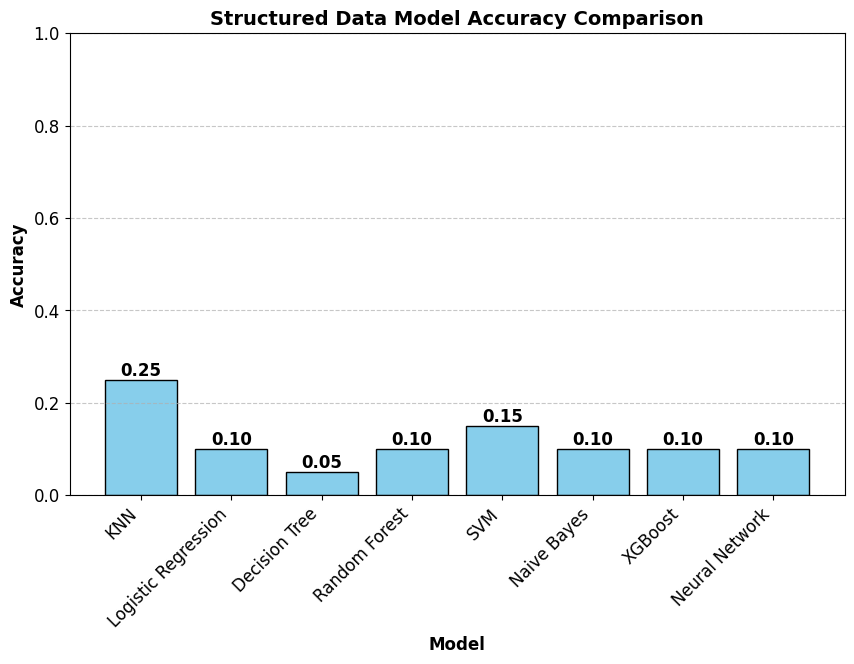

KNN Accuracy: 0.0000
KNN F1-score: 0.0000
Logistic Regression Accuracy: 0.1000
Logistic Regression F1-score: 0.0182
Decision Tree Accuracy: 0.0000
Decision Tree F1-score: 0.0000
Random Forest Accuracy: 0.1000
Random Forest F1-score: 0.0786
SVM Accuracy: 0.1000
SVM F1-score: 0.0182
Naive Bayes Accuracy: 0.0500
Naive Bayes F1-score: 0.0364
XGBoost Accuracy: 0.0500
XGBoost F1-score: 0.0400
Neural Network Accuracy: 0.1500
Neural Network F1-score: 0.0391


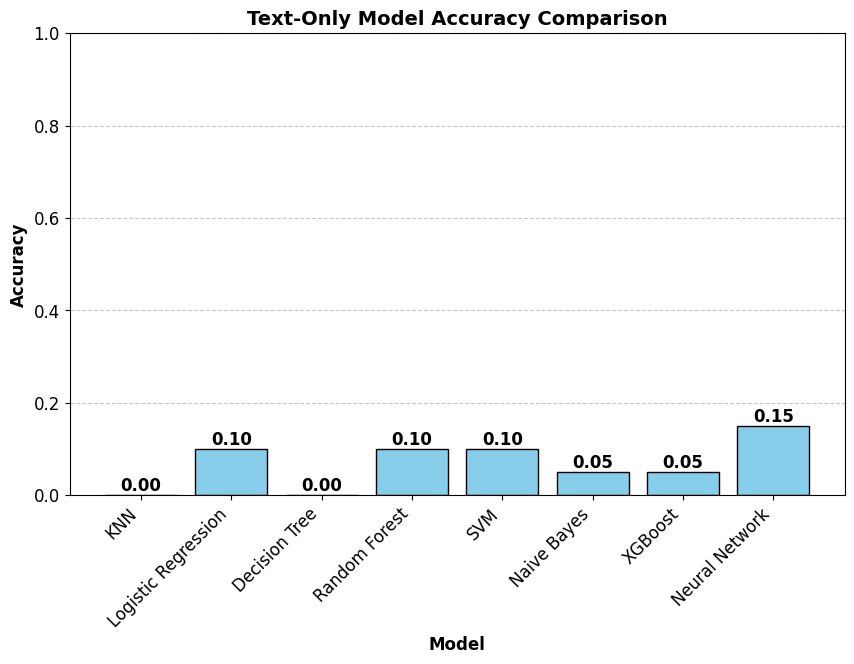

KNN Accuracy: 0.1500
KNN F1-score: 0.1036
Logistic Regression Accuracy: 0.1000
Logistic Regression F1-score: 0.0583
Decision Tree Accuracy: 0.1500
Decision Tree F1-score: 0.1667
Random Forest Accuracy: 0.0500
Random Forest F1-score: 0.0167
SVM Accuracy: 0.1000
SVM F1-score: 0.0182
Naive Bayes Accuracy: 0.1000
Naive Bayes F1-score: 0.0550
XGBoost Accuracy: 0.0500
XGBoost F1-score: 0.0333
Neural Network Accuracy: 0.1500
Neural Network F1-score: 0.0632


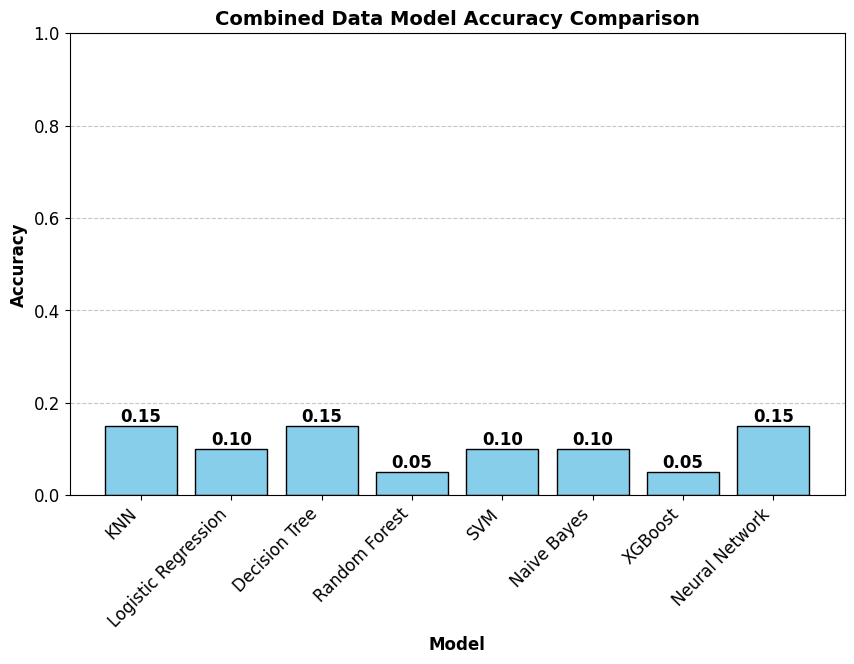

In [63]:
# Evaluating and plotting accuracy for different model categories
evaluate_and_plot(model_predictions_structured, y_test, 'Structured Data Model Accuracy Comparison')
evaluate_and_plot(model_predictions_text_only, y_test, 'Text-Only Model Accuracy Comparison')
evaluate_and_plot(model_predictions_combo, y_test, 'Combined Data Model Accuracy Comparison')
